# Analyzing HR Data 

## Import libraries

In [1]:
# data handling
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## import data 

In [2]:
df = pd.read_csv("data.csv")

## Getting to know the data

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Number of employees in dataset 1470
Number of attrition cases 237


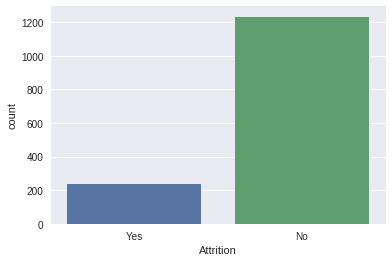

In [5]:
print("Number of employees in dataset", len(df))
print("Number of attrition cases", (df.Attrition=='Yes').sum())
sns.countplot(x='Attrition', data=df)

In [6]:
# df['Attrition'] = pd.Series()
print(len(df))
# make sure that no attrition values are missing
print(len(df[df.Attrition.isnull()]))

df.Attrition = df.Attrition.map(lambda x: 1 if x == 'Yes' else 0)


1470
0


In [7]:
# split df by attrition
df_attrition = df[df['Attrition'] == 1]
df_no_attrition = df[df['Attrition'] == 0]


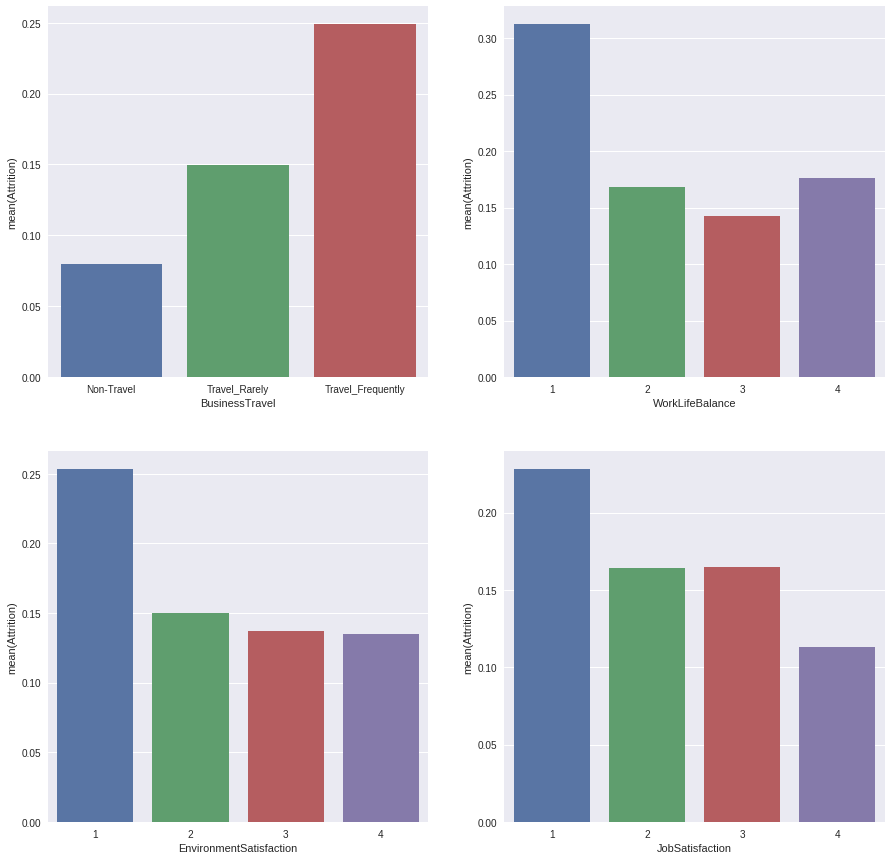

In [8]:
attrition_by_travel = df.groupby("BusinessTravel", as_index=False)["Attrition"].mean()
attrition_by_work_life_balance = df.groupby("WorkLifeBalance", as_index=False)["Attrition"].mean()
attrition_by_env = df.groupby("EnvironmentSatisfaction", as_index=False)["Attrition"].mean()
attrition_by_satisfaction = df.groupby("JobSatisfaction", as_index=False)["Attrition"].mean()

# sns.countplot(x='BusinessTravel', y='Attrition', data=df)
fig, axes = plt.subplots(2, 2, figsize=(15,15))
sns.barplot(x='BusinessTravel', y='Attrition', data=attrition_by_travel, 
            order=['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'], ax=axes[0][0])
sns.barplot(x='WorkLifeBalance', y='Attrition', data=attrition_by_work_life_balance, 
            ax=axes[0][1])

sns.barplot(x='EnvironmentSatisfaction', y='Attrition', data=attrition_by_env, 
            ax=axes[1][0])
sns.barplot(x='JobSatisfaction', y='Attrition', data=attrition_by_satisfaction, 
            ax=axes[1][1])


In [9]:
# Todo Summary, plot satisfaction in relation to monthly income

Attrition       
0          count     1233.000000
           mean      6832.739659
           std       4818.208001
           min       1051.000000
           25%       3211.000000
           50%       5204.000000
           75%       8834.000000
           max      19999.000000
1          count      237.000000
           mean      4787.092827
           std       3640.210367
           min       1009.000000
           25%       2373.000000
           50%       3202.000000
           75%       5916.000000
           max      19859.000000
Name: MonthlyIncome, dtype: float64


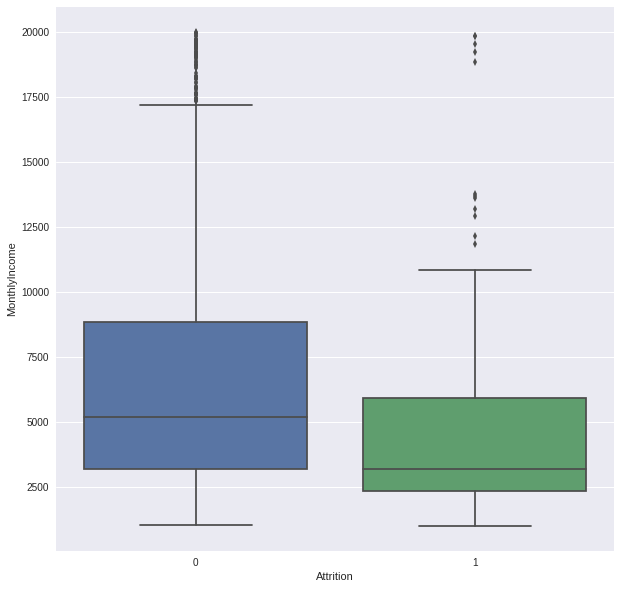

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
print(df.groupby('Attrition')['MonthlyIncome'].describe())

In [11]:
X = pd.get_dummies(df[['MonthlyIncome', 'EnvironmentSatisfaction', 'JobSatisfaction',
                       'WorkLifeBalance', 'BusinessTravel']],
                   'BusinessTravel')
y = df['Attrition']

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

svm = SVC()

svm.fit(X=X_train, y=y_train)
svm.score(X_test, y_test)

0.81447963800904977

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.78280542986425339

In [36]:
df.groupby('OverTime')['Attrition'].mean()

OverTime
No     0.104364
Yes    0.305288
Name: Attrition, dtype: float64

Overtime seams to be a good indicator for attrition. Therefore, we incorporate the feature in our classifiers.

In [37]:
df.OverTime = df.OverTime.map(lambda x: 1 if x == 'Yes' else 0)

In [39]:
X = pd.get_dummies(df[['MonthlyIncome', 'EnvironmentSatisfaction', 'JobSatisfaction',
                       'WorkLifeBalance', 'BusinessTravel', 'OverTime']],
                   'BusinessTravel')
y = df['Attrition']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

svm = SVC()

svm.fit(X=X_train, y=y_train)
svm.score(X_test, y_test)

0.80995475113122173